In [13]:
#This is a notebook with the example from https://vg-sim.readthedocs.io/en/latest/Tutorials%20and%20examples.html

import VGsim
number_of_sites = 2
populations_number = 3
number_of_susceptible_groups = 3
simulator = VGsim.Simulator(number_of_sites, populations_number, number_of_susceptible_groups, seed=1234)

User seed: 1234


In [10]:
simulator.set_transmission_rate(0.25)
simulator.set_recovery_rate(0.099)
simulator.set_sampling_rate(0.001)
simulator.set_transmission_rate(0.5, haplotype="GG")
mutation_rate=0.000003
substitution_weights=[1,1,1,2]#ATCG
simulator.set_mutation_rate(mutation_rate, substitution_weights)
simulator.set_mutation_rate(3*mutation_rate, haplotype='G*', mutation=1)

simulator.set_susceptibility_type(1)
simulator.set_susceptibility_type(2, haplotype='G*')
simulator.set_susceptibility(0.1, susceptibility_type=1)
simulator.set_susceptibility(0.5, susceptibility_type=1, haplotype='G*')
simulator.set_immunity_transition(1/90, source=1, target=0)
simulator.set_susceptibility(0.0, susceptibility_type=2)
simulator.set_immunity_transition(1/180, source=2, target=0)

simulator.set_population_size(10000000, population=0)
simulator.set_population_size(5000000, population=1)
simulator.set_population_size(1000000, population=2)
simulator.set_sampling_multiplier(3, population=1)
simulator.set_sampling_multiplier(0, population=2)
simulator.set_npi([0.1, 0.01, 0.002])
simulator.set_migration_probability(10/365/2)

simulator.simulate(10000000, epidemic_time=110)

Actual sizes: 9808219.17808219 5013698.630136985 1178082.191780822 
WARNING! Actual population size in deme 
2
is more than 10% different from the population size. The migration probabilities might be unrealistically high.
We recommend to check your model with print_populations() method before proceding to simulation.
Check the documentation file:https://vg-sim.readthedocs.io/en/latest/Migration.html for more details.
Achieved internal time limit.
Number of samples: 5426
Total number of iterations: 943958
Success number: 1
Epidemic time: 110.00008313493404
Number of infections: 478628
Number of recoveries: 353747
Number of mutations: 21
Number of accepted migrations: 25676
Number of rejected migrations: 84643
Number of immunity transitions: 80460
----------------------------------


In [12]:

simulator.set_immunity_transition(0.05, source=0, target=1)
simulator.set_immunity_transition(0.05, source=0, target=2)
simulator.set_contact_density(0.7, population=0)
simulator.set_contact_density(0.7, population=1)
simulator.set_migration_probability(2/365/2, source=0, target=2)
simulator.set_migration_probability(2/365/2, source=1, target=2)

simulator.simulate(1000, method='tau', time=300)

Number of iterations:  0
Simulation model time:  110.00008313493404
Number of samples: 5426
Total number of iterations: 943958
Success number: 1
Epidemic time: 110.00008313493404
Number of infections: 478628
Number of recoveries: 353747
Number of mutations: 21
Number of accepted migrations: 25676
Number of rejected migrations: 84643
Number of immunity transitions: 80460
----------------------------------


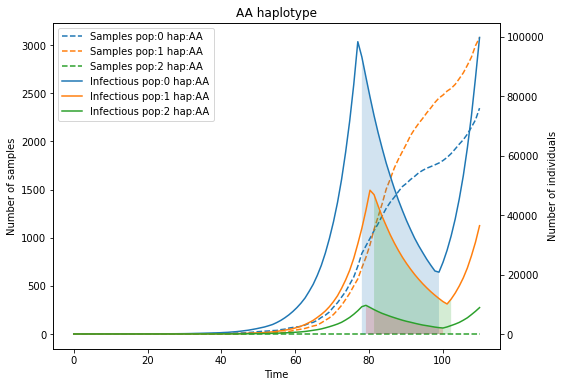

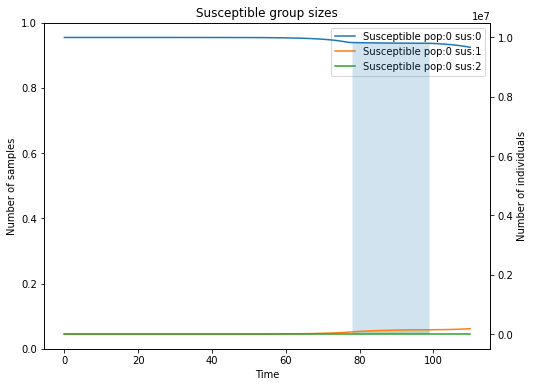

In [5]:
simulator.add_plot_infectious(population=0, haplotype='AA', step_num=100)
simulator.add_plot_infectious(population=1, haplotype='AA', step_num=100)
simulator.add_plot_infectious(population=2, haplotype='AA', step_num=100)
simulator.add_title(name="AA haplotype")
simulator.add_legend()
simulator.plot()

simulator.add_plot_susceptible(population=0, susceptibility_type=0, step_num=100)
simulator.add_plot_susceptible(population=0, susceptibility_type=1, step_num=100)
simulator.add_plot_susceptible(population=0, susceptibility_type=2, step_num=100)
simulator.add_title(name="Susceptible group sizes")
simulator.add_legend()
simulator.plot()


In [6]:
simulator.genealogy()
file_name = "example"
simulator.output_newick(file_name)
simulator.output_mutations(file_name)
simulator.output_migrations(file_name)

simulator.print_basic_parameters()

*****************
***Basic rates***
*****************
+----+------+-------+-------+----+-------+-------------+-------+-------------+
| H  |  TR  |   RR  |   SR  | ST |   M0  |     MW0     |   M1  |     MW1     |
+----+------+-------+-------+----+-------+-------------+-------+-------------+
|    | 0.25 | 0.099 | 0.001 | 1  |       | AA->TA: 1.0 |       | AA->AT: 1.0 |
| AA |      |       |       |    | 3e-06 | AA->CA: 1.0 | 3e-06 | AA->AC: 1.0 |
|    |      |       |       |    |       | AA->GA: 2.0 |       | AA->AG: 2.0 |
|    |      |       |       |    |       |             |       |             |
|    | 0.25 | 0.099 | 0.001 | 1  |       | AT->TT: 1.0 |       | AT->AA: 1.0 |
| AT |      |       |       |    | 3e-06 | AT->CT: 1.0 | 3e-06 | AT->AC: 1.0 |
|    |      |       |       |    |       | AT->GT: 2.0 |       | AT->AG: 2.0 |
|    |      |       |       |    |       |             |       |             |
|    | 0.25 | 0.099 | 0.001 | 1  |       | AC->TC: 1.0 |       | AC->AA: 1.0 

In [7]:
simulator.print_immunity_model()

********************
***Immunity model***
********************
+------+-----+-----+-----+
| H\ST |  S0 |  S1 |  S2 |
+------+-----+-----+-----+
|  AA  | 1.0 | 0.1 | 0.0 |
|  AT  | 1.0 | 0.1 | 0.0 |
|  AC  | 1.0 | 0.1 | 0.0 |
|  AG  | 1.0 | 0.1 | 0.0 |
|  TA  | 1.0 | 0.1 | 0.0 |
|  TT  | 1.0 | 0.1 | 0.0 |
|  TC  | 1.0 | 0.1 | 0.0 |
|  TG  | 1.0 | 0.1 | 0.0 |
|  CA  | 1.0 | 0.1 | 0.0 |
|  CT  | 1.0 | 0.1 | 0.0 |
|  CC  | 1.0 | 0.1 | 0.0 |
|  CG  | 1.0 | 0.1 | 0.0 |
|  GA  | 1.0 | 0.5 | 0.0 |
|  GT  | 1.0 | 0.5 | 0.0 |
|  GC  | 1.0 | 0.5 | 0.0 |
|  GG  | 1.0 | 0.5 | 0.0 |
+------+-----+-----+-----+
Legend:
H - haplotype
ST - susceptibility type

*******************************
***Immunity transition rates***
*******************************
+----+----------------------+------+------+
| ID |          0           |  1   |  2   |
+----+----------------------+------+------+
| 0  |         0.0          | 0.05 | 0.05 |
| 1  | 0.011111111111111112 | 0.0  | 0.0  |
| 2  | 0.005555555555555556 | 0.0

In [ ]:
simulator.print_populations()